#Description: 


- @Author: Jeferson Andres Alvarez Rincon
- @Date:2022/03/19
- @Description: We are going to apply the algorithm on a data set of Alibaba shares from the United States stock market, where we will find:

  - The CLOSE signal (daily closing price)
  - The VOLUME signal (number of shares that have changed hands over that period of time).


#DATOS DE MERCADEO DE VALORES (Acciones de Alibaba)

#Importando librerías generales


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Descargando data usando Web-scrawping


In [2]:
UrlWeb= "https://es-us.finanzas.yahoo.com/quote/BABA/history?period1=1577836800&period2=1647648000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
ClassName="W(100%) M(0)"  

#Importando Beautiful

In [3]:
import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

Opt2-con Selenium




In [4]:
!pip install kora -q
!apt install chromium-chromedriver
!pip install selenium

     |████████████████████████████████| 57 kB 4.0 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 88.3 MB of archives.
After this operation, 294 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 99.0.4844.51-0ubuntu0.18.04.1 [1,143 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 99.0.4844.51-0ubuntu0.18.04.1 [77.6 MB]
Get:3 htt

In [5]:
from kora.selenium import wd
wd.get(UrlWeb)
soup = BeautifulSoup(wd.page_source, 'html.parser') 

In [6]:
tabla= soup.find_all(class_=ClassName)
df_list_table=pd.read_html(str(tabla))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df=pd.DataFrame(df_list_table[0])    

In [10]:
#df.head(10)                                                       #LAS PRIMERAS FILAS
df.tail(1000) 

,Fecha,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
0,18 mar 2022,100.50,111.74,99.61,108.30,108.30,82600116
1,18 mar 2022,100.50,111.74,99.60,108.30,108.30,83715800
2,17 mar 2022,99.14,101.89,95.77,100.37,100.37,80663200
3,16 mar 2022,92.00,105.74,87.12,104.98,104.98,159834300
4,15 mar 2022,75.10,80.14,73.28,76.76,76.76,86209300
...,...,...,...,...,...,...,...
96,01 nov 2021,165.84,171.90,165.80,170.17,170.17,17609500
97,29 oct 2021,167.07,168.56,162.72,164.94,164.94,17155400
98,28 oct 2021,168.49,170.35,166.77,169.79,169.79,12440100
99,27 oct 2021,167.53,172.45,167.34,169.23,169.23,11801800


In [11]:
#tenemosque borrar la ultima fila
df = df[:-1]

#Conociendo los datos descargados

In [12]:
print(df.info())
print("____________describe____________\n",df.describe())
print("____________nulos?____________\n",df.isnull().sum())
#print("Rows, Cols->",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fecha              100 non-null    object
 1   Abrir              100 non-null    object
 2   Alto               100 non-null    object
 3   Bajo               100 non-null    object
 4   Cierre*            100 non-null    object
 5   Cierre ajustado**  100 non-null    object
 6   Volumen            100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB
None
____________describe____________
               Fecha   Abrir    Alto    Bajo Cierre* Cierre ajustado**  \
count           100     100     100     100     100               100   
unique           99      97      98      97      99                99   
top     18 mar 2022  100.50  111.74  121.94  108.30            108.30   
freq              2       2       2       2       2                 2   

         Volumen  
count     

#Normalización de los datos.

#Convertimos los campos object a datetime o numeric (int/float)

In [13]:
df['Fecha']= df['Fecha'].str.replace(' ene ','/01/')
df['Fecha']= df['Fecha'].str.replace(' feb ','/02/')
df['Fecha']= df['Fecha'].str.replace(' mar ','/03/')
df['Fecha']= df['Fecha'].str.replace(' abr ','/04/')
df['Fecha']= df['Fecha'].str.replace(' may ','/05/')
df['Fecha']= df['Fecha'].str.replace(' jun ','/06/')
df['Fecha']= df['Fecha'].str.replace(' jul ','/07/')
df['Fecha']= df['Fecha'].str.replace(' ago ','/08/')
df['Fecha']= df['Fecha'].str.replace(' sep ','/09/')
df['Fecha']= df['Fecha'].str.replace(' oct ','/10/')
df['Fecha']= df['Fecha'].str.replace(' nov ','/11/')
df['Fecha']= df['Fecha'].str.replace(' dic ','/12/')

In [14]:
df['Fecha']=pd.to_datetime(df['Fecha'], dayfirst = True)        # Convertimos el campo FECHA en tipo DATETIME
df['Abrir'] = pd.to_numeric(df['Abrir'])                        #  convertimos el campo a numerico 
df['Alto'] = pd.to_numeric(df['Alto'])
df['Bajo'] = pd.to_numeric(df['Bajo'])
df['Cierre*'] = pd.to_numeric(df['Cierre*'])
df['Cierre ajustado**'] = pd.to_numeric(df['Cierre ajustado**'])
df['Volumen'] = pd.to_numeric(df['Volumen'])

#Eliminando columnas que no necesitaremos 

In [15]:
#borrar nulos o no?
df = df.dropna()
df = df.reset_index(drop=True)

In [16]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Fecha'] # Guardamos la columna Date.
df = df.drop('Fecha', 1) # Borramos la columna del dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Normaliza todos los datos entre [0, 1].

In [17]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0:'Abrir',1:'Alto',2:'Bajo',3:'Cierre*',4: 'Cierre ajustado**', 5: 'Volumen'})

In [18]:
df_escalado.head()
#df_escalado.isnull().sum()

,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
0,0.269696,0.342325,0.279928,0.337651,0.337651,0.485718
1,0.269696,0.342325,0.279821,0.337651,0.337651,0.493147
2,0.255256,0.235619,0.239103,0.252757,0.252757,0.472820
3,0.179444,0.277326,0.147140,0.302109,0.302109,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.509750


#Representación gráfica de los datos.

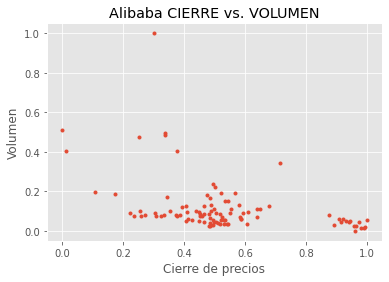

In [19]:
#%% Representación gráfica de los datos.
x = df_escalado['Cierre*'].values
y = df_escalado['Volumen'].values
plt.xlabel('Cierre de precios')
plt.ylabel('Volumen')
plt.title('Alibaba CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=3)

#Aplicación de k-means.

#Realizar una gráfica elbow o de codo

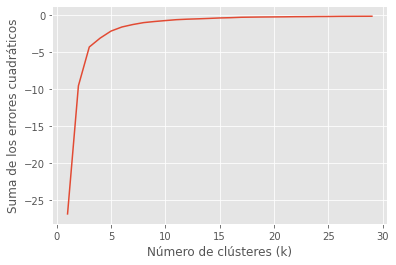

In [20]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

#Aplicar el algoritmo de k-mean

In [21]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.48046972 0.46641174 0.47430793 0.47137192 0.47137192 0.0826658 ]
 [0.9669184  0.95246317 0.95888927 0.94754309 0.94754309 0.03921897]
 [0.62479059 0.6042923  0.61113474 0.59778872 0.59778872 0.11497399]
 [0.07963474 0.10078359 0.06251329 0.10427149 0.10427149 0.63717267]
 [0.29041463 0.2781795  0.27797417 0.27747966 0.27747966 0.19668644]]


#Etiquetado de datos.

In [22]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

In [24]:
df.head(1000)

,Date,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen,label
0,2022-03-18,100.50,111.74,99.61,108.30,108.30,82600116,4
1,2022-03-18,100.50,111.74,99.60,108.30,108.30,83715800,4
2,2022-03-17,99.14,101.89,95.77,100.37,100.37,80663200,4
3,2022-03-16,92.00,105.74,87.12,104.98,104.98,159834300,3
4,2022-03-15,75.10,80.14,73.28,76.76,76.76,86209300,3
...,...,...,...,...,...,...,...,...
95,2021-11-02,167.10,167.10,162.76,162.90,162.90,19072900,1
96,2021-11-01,165.84,171.90,165.80,170.17,170.17,17609500,1
97,2021-10-29,167.07,168.56,162.72,164.94,164.94,17155400,1
98,2021-10-28,168.49,170.35,166.77,169.79,169.79,12440100,1


#Representación gráfica de los clústeres k-means

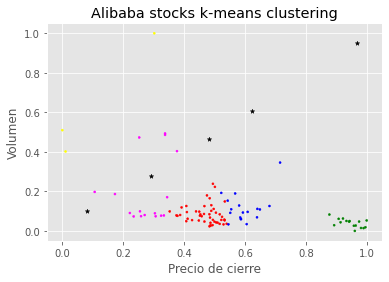

In [25]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=4)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Alibaba stocks k-means clustering')
plt.show()